<a href="https://colab.research.google.com/github/gjindal74/Neural-Networks/blob/main/Iris/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [133]:
# Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1) # dc indicates fully connected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [134]:
# Pick a manual seed for randomization
torch.manual_seed(41)
model = Model()

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
data = "/content/Iris.csv"
df = pd.read_csv(data)

In [137]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [138]:
# Change last column from strings to integers
df['Species'] = df['Species'].replace('Iris-setosa', 0.0)
df['Species'] = df['Species'].replace('Iris-versicolor', 1.0)
df['Species'] = df['Species'].replace('Iris-virginica', 2.0)
df

/tmp/ipython-input-2337438705.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace('Iris-virginica', 2.0)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


In [139]:
Y = df['Species']
X = df.drop("Species", axis=1)
X = X.drop("Id", axis=1)


In [140]:
X = X.values
Y = Y.values

In [141]:
from sklearn.model_selection import train_test_split

Training

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=41)

In [143]:
# Convert X features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [144]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [145]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(x_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972
Epoch: 100 and loss: 0.05286576226353645
Epoch: 110 and loss: 0.04508381709456444
Epoch: 120 and loss: 0.03979949280619621
Epoch: 130 and loss: 0.035970740020275116
Epoch: 140 and loss: 0.03293721750378609
Epoch: 150 and loss: 0.03041938506066799
Epoch: 160 and loss: 0.026795217767357826
Epoch: 170 and loss: 0.02338254824280739
Epoch: 180 and loss: 0.020531881600618362
Epoch: 190 and loss: 0.018495969474315643


Text(0.5, 0, 'Epoch')

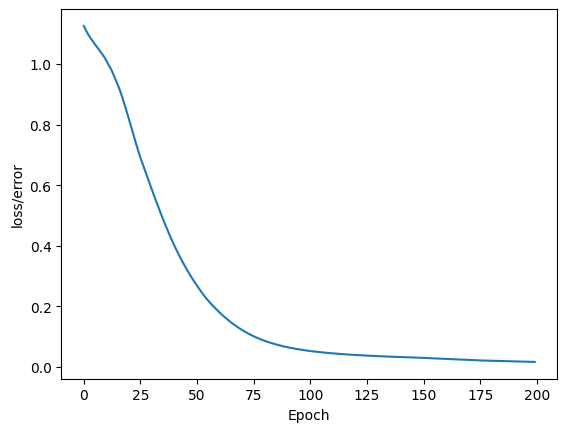

In [146]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

Evaluations

In [147]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(x_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [148]:
loss

tensor(0.1816)

In [149]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
# the maximum is what the network thinks the flower is
    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-7.1090,  3.8945,  9.0009]) 	 2 	 2
2.)  tensor([-9.7568,  1.8037, 15.7614]) 	 2 	 2
3.)  tensor([-10.9675,   2.8777,  16.6036]) 	 2 	 2
4.)  tensor([-3.7644,  8.0391, -1.2691]) 	 1 	 1
5.)  tensor([-9.0332,  3.5238, 12.6383]) 	 2 	 2
6.)  tensor([-1.8244,  8.6935, -5.3425]) 	 1 	 1
7.)  tensor([-6.8734,  4.9821,  7.3703]) 	 2 	 2
8.)  tensor([-3.6489,  8.2259, -1.6743]) 	 1 	 1
9.)  tensor([-7.9281,  4.2588,  9.9576]) 	 2 	 2
10.)  tensor([-10.4298,   1.8741,  16.8126]) 	 2 	 2
11.)  tensor([-6.4726,  5.1594,  6.5086]) 	 2 	 2
12.)  tensor([ 12.4419,   2.4570, -21.9049]) 	 0 	 0
13.)  tensor([ 11.4217,   2.2044, -19.9136]) 	 0 	 0
14.)  tensor([-0.1940,  6.9626, -6.0924]) 	 1 	 1
15.)  tensor([ 10.1568,   3.3059, -19.1088]) 	 0 	 0
16.)  tensor([-5.9767,  5.7989,  4.9675]) 	 2 	 1
17.)  tensor([ 11.2091,   2.5254, -19.9652]) 	 0 	 0
18.)  tensor([-6.8898,  4.2924,  8.1948]) 	 1 	 2
19.)  tensor([ 12.0366,   2.3664, -21.1260]) 	 0 	 0
20.)  tensor([  9.6811,   2.7818, -17.

new flower specs

In [150]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [151]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 12.1670,   2.2441, -21.1874])


Save and loading models

In [152]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [153]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [154]:

# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)